<a href="https://colab.research.google.com/github/B-Aarthy/SCT_DS_4/blob/main/accident.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload your Traffic Accident CSV file


Saving sample_101_Traffic_Crashes_-_Crashes.csv to sample_101_Traffic_Crashes_-_Crashes.csv

Dataset Loaded Successfully!
                                     CRASH_RECORD_ID     RD_NO  \
0  012c5bfce715efb2f2b387d6dd86f9c13e9dc1809fb52a...  JG341943   
1  01d457f032e23d935a0b8f6b4c88221375180ffd4cd959...  JG338388   
2  02249b4747a4bf40b88a8357304a98dfeaef9c38eebbf0...  JG350008   
3  03e3b6caad71b78ed9ae325648effa9512bfb2517aed30...  JG338049   
4  0481fc919b38f1572d4ba04b069766102d904a662ff096...  JG338431   

  CRASH_DATE_EST_I              CRASH_DATE  POSTED_SPEED_LIMIT  \
0              NaN  07/12/2023 03:05:00 PM                  30   
1              NaN  07/12/2023 05:50:00 PM                  30   
2              NaN  07/12/2023 02:00:00 PM                  30   
3              NaN  07/12/2023 07:05:00 AM                  30   
4              NaN  07/12/2023 06:30:00 PM                  30   

  TRAFFIC_CONTROL_DEVICE DEVICE_CONDITION      WEATHER_CONDITION  \
0            NO 

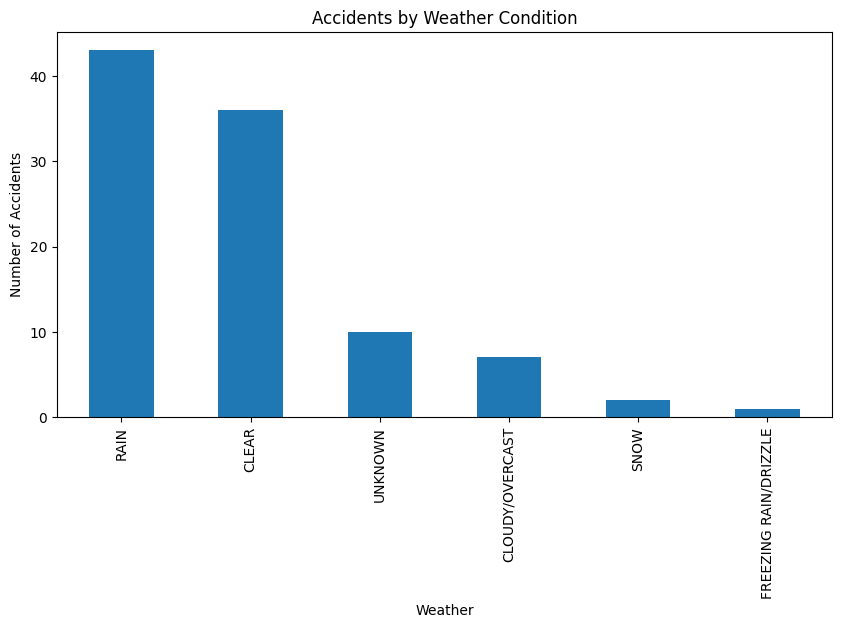

Creating Accident Hotspot Map...

--- KEY INSIGHTS ---
Top Weather Conditions:
weather
RAIN       43
CLEAR      36
UNKNOWN    10
Name: count, dtype: int64

Top Road Conditions:

Time of Day Distribution:


In [1]:

!pip install folium seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

from google.colab import files
print("Upload your Traffic Accident CSV file")
uploaded = files.upload()

file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

print("\nDataset Loaded Successfully!")
print(df.head())
print("\nColumns:\n", df.columns)

df.columns = df.columns.str.strip().str.lower()
rename_map = {
    'weather_condition': 'weather',
    'road_condition': 'road',
    'crash_time': 'time',
    'accident_time': 'time',
    'latitude': 'lat',
    'longitude': 'lon'
}
df.rename(columns=rename_map, inplace=True)

# Drop rows with missing critical values
df.dropna(subset=['lat', 'lon'], inplace=True)

if 'time' in df.columns:
    df['time'] = pd.to_datetime(df['time'], errors='coerce')
    df['hour'] = df['time'].dt.hour

    def time_category(hour):
        if 5 <= hour < 12:
            return 'Morning'
        elif 12 <= hour < 17:
            return 'Afternoon'
        elif 17 <= hour < 21:
            return 'Evening'
        else:
            return 'Night'

    df['time_of_day'] = df['hour'].apply(time_category)

    plt.figure(figsize=(7,5))
    sns.countplot(x='time_of_day', data=df)
    plt.title("Accidents by Time of Day")
    plt.show()

if 'weather' in df.columns:
    plt.figure(figsize=(10,5))
    df['weather'].value_counts().head(10).plot(kind='bar')
    plt.title("Accidents by Weather Condition")
    plt.xlabel("Weather")
    plt.ylabel("Number of Accidents")
    plt.show()

if 'road' in df.columns:
    plt.figure(figsize=(10,5))
    df['road'].value_counts().head(10).plot(kind='bar', color='orange')
    plt.title("Accidents by Road Condition")
    plt.xlabel("Road Condition")
    plt.ylabel("Number of Accidents")
    plt.show()

print("Creating Accident Hotspot Map...")

map_center = [df['lat'].mean(), df['lon'].mean()]
accident_map = folium.Map(location=map_center, zoom_start=10)

for _, row in df.sample(min(1000, len(df))).iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=3,
        color='red',
        fill=True,
        fill_opacity=0.6
    ).add_to(accident_map)

accident_map

if 'time_of_day' in df.columns and 'weather' in df.columns:
    heat_data = pd.crosstab(df['time_of_day'], df['weather'])

    plt.figure(figsize=(12,6))
    sns.heatmap(heat_data, cmap='Reds')
    plt.title("Accidents Heatmap: Time of Day vs Weather")
    plt.show()

print("\n--- KEY INSIGHTS ---")
print("Top Weather Conditions:")
if 'weather' in df.columns:
    print(df['weather'].value_counts().head(3))

print("\nTop Road Conditions:")
if 'road' in df.columns:
    print(df['road'].value_counts().head(3))

print("\nTime of Day Distribution:")
if 'time_of_day' in df.columns:
    print(df['time_of_day'].value_counts())
